In [5]:
import pandas as pd
df=pd.read_csv("C:/Users/karunya/Documents/Guvi projects/NLP sentiment Analysis/chatgpt_reviews - chatgpt_reviews.csv")
display(data)

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2/15/2025,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No
1,10/16/2024,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes
2,10/16/2024,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes
3,12/21/2024,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes
4,3/23/2025,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6/13/2024,Very Helpful,Little section hit her through. Likely job ind...,5,john32,30,83,Web,de,Australia,3.0,No
9996,7/16/2024,Buggy,Throw with record relationship help reduce vot...,3,michael25,68,189,Mobile,es,Germany,3.5,Yes
9997,7/22/2024,Not Accurate,Within nothing study charge all. Toward milita...,3,sean13,10,185,Web,de,India,3.0,Yes
9998,5/24/2024,Needs Improvement,Rule kitchen trouble cultural.\nDeep manage ad...,3,pjones,48,163,Mobile,fr,UK,3.0,Yes


In [6]:
df.shape

(10000, 12)

In [7]:
df.info

<bound method DataFrame.info of             date                 title  \
0      2/15/2025            Impressive   
1     10/16/2024         Waste of Time   
2     10/16/2024         Waste of Time   
3     12/21/2024          Not Accurate   
4      3/23/2025  Fantastic Experience   
...          ...                   ...   
9995   6/13/2024          Very Helpful   
9996   7/16/2024                 Buggy   
9997   7/22/2024          Not Accurate   
9998   5/24/2024     Needs Improvement   
9999   2/17/2025  Fantastic Experience   

                                                 review  rating  \
0     Mother former community upon vote fact. Sure s...       2   
1     General paper understand main. Or age half won...       5   
2     Here situation his high stage. Agree certainly...       4   
3     Rule court behind growth reality. Tonight whos...       1   
4     Case opportunity season road write. Effort gre...       3   
...                                                 ...     .

In [10]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from langdetect import detect

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karunya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karunya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\karunya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\karunya\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:
# Check missing values in title and review
print(df[['title', 'review']].isnull().sum())

title     0
review    0
dtype: int64


In [12]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isnull(text):
        return ""
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and punctuation
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join back to string
    return ' '.join(cleaned_tokens)


In [13]:
df['cleaned_title'] = df['title'].apply(preprocess_text)
df['cleaned_review'] = df['review'].apply(preprocess_text)


In [14]:
# This is useful if you want to filter or process only English reviews
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

# Apply on the cleaned review or original
df['detected_language'] = df['review'].apply(detect_language)

# Optional: Filter for English reviews only
df = df[df['detected_language'] == 'en']


In [8]:
import re

# Convert to lowercase and remove punctuation from both 'title' and 'review'
def clean_lowercase_punctuation(text):
    if pd.isnull(text):
        return ""
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Apply the function
df['cleaned_title'] = df['title'].apply(clean_lowercase_punctuation)
df['cleaned_review'] = df['review'].apply(clean_lowercase_punctuation)

# Display a few rows of the cleaned text
df[['title', 'cleaned_title', 'review', 'cleaned_review']].head()


,title,cleaned_title,review,cleaned_review
0,Impressive,impressive,Mother former community upon vote fact. Sure s...,mother former community upon vote fact sure st...
1,Waste of Time,waste of time,General paper understand main. Or age half won...,general paper understand main or age half wond...
2,Waste of Time,waste of time,Here situation his high stage. Agree certainly...,here situation his high stage agree certainly ...
3,Not Accurate,not accurate,Rule court behind growth reality. Tonight whos...,rule court behind growth reality tonight whose...
4,Fantastic Experience,fantastic experience,Case opportunity season road write. Effort gre...,case opportunity season road write effort gree...


In [9]:
# Save the preprocessed dataset to a new CSV file
output_path = "C:/Users/karunya/Documents/Guvi projects/NLP sentiment Analysis/chatgpt_reviews_cleaned.csv"
df.to_csv(output_path, index=False)

output_path


'C:/Users/karunya/Documents/Guvi projects/NLP sentiment Analysis/chatgpt_reviews_cleaned.csv'

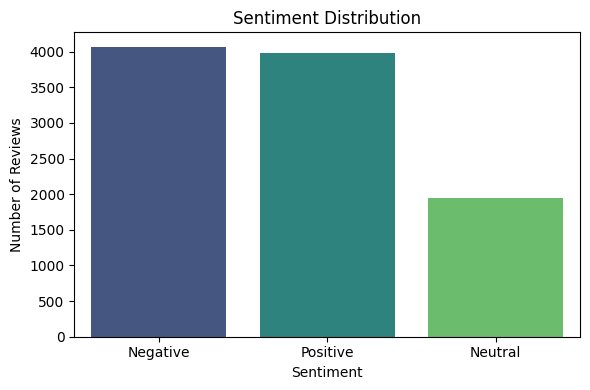

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# Assign sentiment based on rating
def assign_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

# Apply sentiment safely with .loc to avoid warnings
df.loc[:, 'sentiment'] = df['rating'].apply(assign_sentiment)

# Count sentiment distribution
sentiment_counts = df['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'count']

# Plot sentiment distribution (Future-proof version)
plt.figure(figsize=(6, 4))
sns.barplot(data=sentiment_counts, x='sentiment', y='count', hue='sentiment', palette='viridis', legend=False)
plt.title("Sentiment Distribution")
plt.ylabel("Number of Reviews")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()


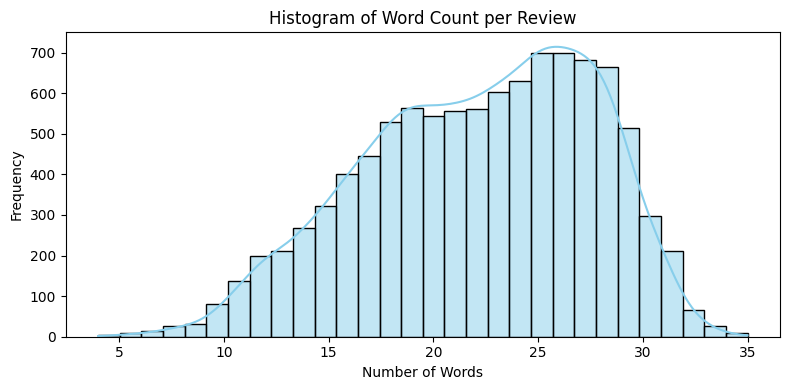

In [11]:
# Count number of words in each cleaned review
df['review_word_count'] = df['cleaned_review'].apply(lambda x: len(x.split()))

# Plot histogram of word counts
plt.figure(figsize=(8, 4))
sns.histplot(df['review_word_count'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Word Count per Review')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


C:\Users\karunya\AppData\Local\Temp\ipykernel_17692\3668690963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_char_count'] = df['cleaned_review'].apply(len)


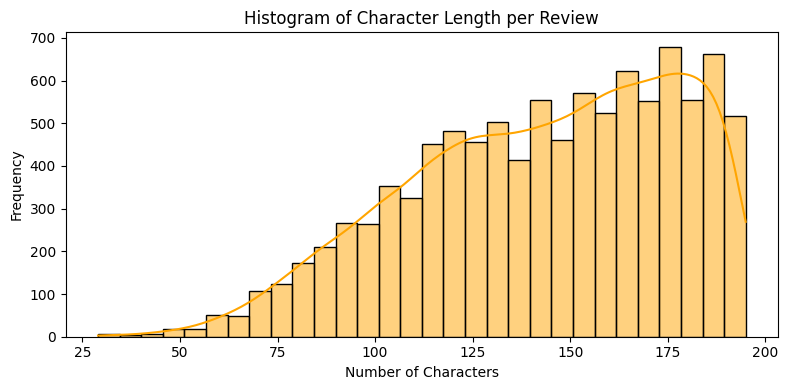

In [25]:
# Count number of characters in each cleaned review
df['review_char_count'] = df['cleaned_review'].apply(len)

# Plot histogram of character lengths
plt.figure(figsize=(8, 4))
sns.histplot(df['review_char_count'], bins=30, kde=True, color='orange')
plt.title('Histogram of Character Length per Review')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [7]:
print(df.columns)

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase'],
      dtype='object')


In [15]:
from sentence_transformers import SentenceTransformer

sbert = SentenceTransformer('all-MiniLM-L6-v2')  # small & fast
embeddings = sbert.encode(df['cleaned_review'].tolist(), batch_size=32, show_progress_bar=True)
print("Embeddings shape:", embeddings.shape)  # (n_samples, 384)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\karunya\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\karunya\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

Embeddings shape: (10000, 384)


In [53]:
label2id = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
df_hf = df[['cleaned_review', 'sentiment']].rename(
    columns={'cleaned_review': 'text', 'sentiment': 'label'}
)
df_hf['label'] = df_hf['label'].map(label2id)

# Quick sanity check
print(df_hf.head())
print("Unique labels in df_hf:", df_hf['label'].unique())
dataset = Dataset.from_pandas(df_hf)


                                                text  label
0  mother former community upon vote fact sure st...      0
1  general paper understand main or age half wond...      2
2  here situation his high stage agree certainly ...      2
3  rule court behind growth reality tonight whose...      0
4  case opportunity season road write effort gree...      1
Unique labels in df_hf: [0 2 1]


In [66]:
#Sentiment Analysis with TF-IDF + Logistic Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 1. Load and prepare the data
# Make sure 'cleaned_review' and 'sentiment' columns exist
label2id = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
df['label'] = df['sentiment'].map(label2id)

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_review'], df['label'], test_size=0.1, random_state=42
)

# 3. Convert text to TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 4. Train a classifier (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# 5. Evaluate
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred, target_names=label2id.keys()))


              precision    recall  f1-score   support

    Negative       0.39      0.49      0.44       412
     Neutral       0.24      0.04      0.07       185
    Positive       0.37      0.42      0.39       403

    accuracy                           0.38      1000
   macro avg       0.33      0.32      0.30      1000
weighted avg       0.36      0.38      0.35      1000



In [67]:
#TF-IDF + Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Use same TF-IDF from earlier
model_nb = MultinomialNB()
model_nb.fit(X_train_tfidf, y_train)

# Predict & Evaluate
y_pred_nb = model_nb.predict(X_test_tfidf)
print("🔍 Naive Bayes Results:")
print(classification_report(y_test, y_pred_nb, target_names=label2id.keys()))


🔍 Naive Bayes Results:
              precision    recall  f1-score   support

    Negative       0.39      0.53      0.45       412
     Neutral       0.00      0.00      0.00       185
    Positive       0.37      0.40      0.39       403

    accuracy                           0.38      1000
   macro avg       0.25      0.31      0.28      1000
weighted avg       0.31      0.38      0.34      1000



C:\Users\karunya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karunya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karunya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [68]:
#TF-IDF + Support Vector Machine (SVM)
from sklearn.svm import LinearSVC

model_svm = LinearSVC()
model_svm.fit(X_train_tfidf, y_train)

# Predict & Evaluate
y_pred_svm = model_svm.predict(X_test_tfidf)
print("🔍 SVM Results:")
print(classification_report(y_test, y_pred_svm, target_names=label2id.keys()))


🔍 SVM Results:
              precision    recall  f1-score   support

    Negative       0.40      0.49      0.44       412
     Neutral       0.25      0.06      0.10       185
    Positive       0.37      0.41      0.39       403

    accuracy                           0.38      1000
   macro avg       0.34      0.32      0.31      1000
weighted avg       0.36      0.38      0.36      1000



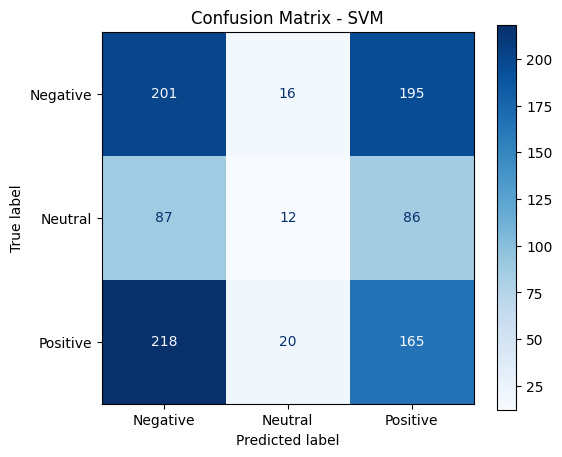

In [69]:
#Confusion Matrix for SVM

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_svm, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label2id.keys())

# Plot
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(cmap='Blues', ax=ax)
plt.title("Confusion Matrix - SVM")
plt.show()

In [118]:
#Analyze Class Imbalance
df['sentiment'].value_counts()


sentiment
LABEL_1    9158
LABEL_2     625
LABEL_0     217
Name: count, dtype: int64

In [106]:
import pandas as pd

df = pd.read_csv("C:/Users/karunya/Documents/Guvi projects/NLP sentiment Analysis/labeled_reviews.csv")
print(df.head())
print(df.columns)

         date                 title  \
0   2/15/2025            Impressive   
1  10/16/2024         Waste of Time   
2  10/16/2024         Waste of Time   
3  12/21/2024          Not Accurate   
4   3/23/2025  Fantastic Experience   

                                              review  rating       username  \
0  Mother former community upon vote fact. Sure s...       2          ybass   
1  General paper understand main. Or age half won...       5        glenn33   
2  Here situation his high stage. Agree certainly...       4       debbie27   
3  Rule court behind growth reality. Tonight whos...       1  hannahrussell   
4  Case opportunity season road write. Effort gre...       3        cnorton   

   helpful_votes  review_length platform language   location  version  \
0             68             78   Mobile       es     Canada      3.0   
1             71            193      Web       de      India      4.1   
2             66            184      Web       hi      India      4.1  

Classification Report:

              precision    recall  f1-score   support

    Negative       0.17      0.37      0.23        43
     Neutral       0.97      0.89      0.93      1832
    Positive       0.44      0.77      0.56       125

    accuracy                           0.87      2000
   macro avg       0.53      0.68      0.57      2000
weighted avg       0.92      0.87      0.89      2000



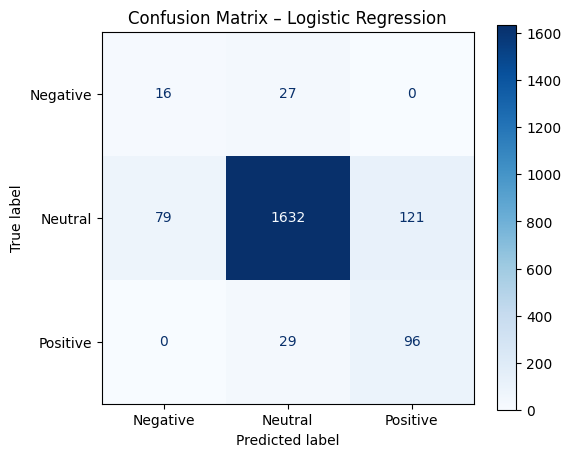


✅ Model and vectorizer saved to disk.


In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

# 1. Load your labeled dataset 
df = pd.read_csv("C:/Users/karunya/Documents/Guvi projects/NLP sentiment Analysis/labeled_reviews.csv")

# 2. Map the pipeline labels to integers and back to human‑readable
label2id = {'LABEL_0': 0, 'LABEL_1': 1, 'LABEL_2': 2}
id2label = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
df['label'] = df['sentiment'].map(label2id)

# 3. Train/test split (stratified by label to preserve class ratios)
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_review'],
    df['label'],
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)

# 4. Vectorize text with TF‑IDF (unigrams + bigrams)
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf  = vectorizer.transform(X_test)

# 5. Balance classes by random oversampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train_tfidf, y_train)

# 6. Train Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_res, y_res)

# 7. Evaluate on the test set
y_pred = model.predict(X_test_tfidf)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=[id2label[i] for i in sorted(id2label)]))

# 8. Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(cm, display_labels=[id2label[i] for i in [0,1,2]])
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

# 9. Save the trained model and vectorizer for later use
joblib.dump(model, 'logreg_sentiment_model.joblib')
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

print("\n✅ Model and vectorizer saved to disk.")


In [119]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the text
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf  = vectorizer.transform(X_test)

# Apply oversampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train_tfidf, y_train)

# Train Logistic Regression with class weights
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_res, y_res)

# Evaluate on test set
y_pred = model.predict(X_test_tfidf)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.17      0.37      0.23        43
           1       0.97      0.89      0.93      1832
           2       0.44      0.77      0.56       125

    accuracy                           0.87      2000
   macro avg       0.53      0.68      0.57      2000
weighted avg       0.92      0.87      0.89      2000



In [120]:
from sklearn.metrics import classification_report, f1_score

# Print classification report to examine Precision, Recall, and F1-Score per class
print(classification_report(y_test, y_pred, target_names=['Negative','Neutral','Positive']))

# You can also directly check F1-score for negative sentiment
f1_negative = f1_score(y_test, y_pred, labels=[0], average='micro')
print(f"F1-Score for Negative Class: {f1_negative}")


              precision    recall  f1-score   support

    Negative       0.17      0.37      0.23        43
     Neutral       0.97      0.89      0.93      1832
    Positive       0.44      0.77      0.56       125

    accuracy                           0.87      2000
   macro avg       0.53      0.68      0.57      2000
weighted avg       0.92      0.87      0.89      2000

F1-Score for Negative Class: 0.2318840579710145


                                              review  review_length sentiment
0  Mother former community upon vote fact. Sure s...             78   LABEL_1
1  General paper understand main. Or age half won...            193   LABEL_1
2  Here situation his high stage. Agree certainly...            184   LABEL_2
3  Rule court behind growth reality. Tonight whos...            193   LABEL_1
4  Case opportunity season road write. Effort gre...            131   LABEL_1


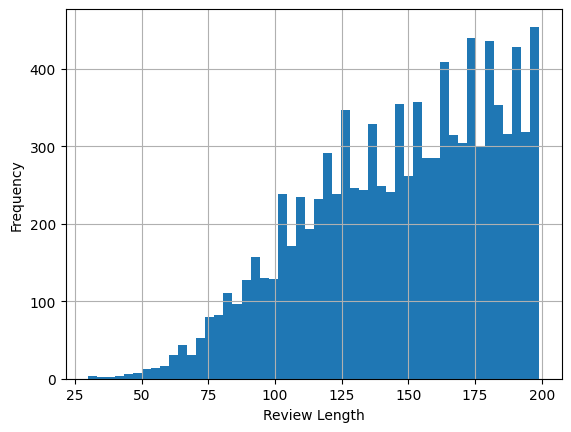

In [121]:
df['review_length'] = df['review'].apply(len)
print(df[['review', 'review_length', 'sentiment']].head())

# Plot length distribution
df['review_length'].hist(bins=50)
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.show()


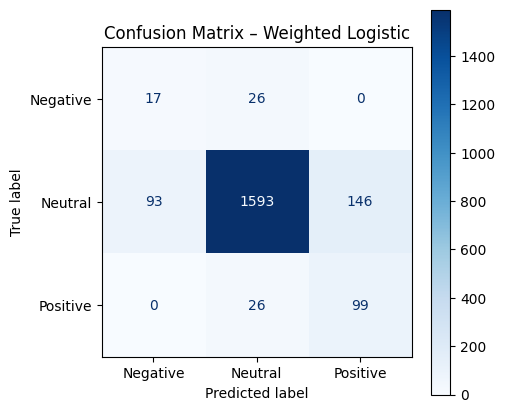

In [115]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_w, labels=[0,1,2])
disp = ConfusionMatrixDisplay(cm, display_labels=['Negative','Neutral','Positive'])
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix – Weighted Logistic")
plt.show()


In [116]:
def predict_sentiment(text):
    X_input = vectorizer.transform([text])
    pred = model.predict(X_input)[0]
    return id2label[pred]

# Try it
predict_sentiment("""Here situation his high stage. Agree certainly blue thousand sense.
Help remember media over as country. Rich box increase place better energy tough nation. Care think huge game value.""")


'Neutral'

In [117]:
import joblib

# Load the saved model and vectorizer
model = joblib.load('logreg_sentiment_model.joblib')
vectorizer = joblib.load('tfidf_vectorizer.joblib')

# Test sample inputs
sample_texts = [
    "I absolutely loved the product!",
    "It was okay, nothing special.",
    "Terrible experience, very disappointed."
]

# Preprocess and predict
X_sample = vectorizer.transform(sample_texts)
predictions = model.predict(X_sample)

# Decode predictions
id2label = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
decoded_preds = [id2label[p] for p in predictions]

# Output
for text, label in zip(sample_texts, decoded_preds):
    print(f"Review: {text}\nPredicted Sentiment: {label}\n")


Review: I absolutely loved the product!
Predicted Sentiment: Positive

Review: It was okay, nothing special.
Predicted Sentiment: Neutral

Review: Terrible experience, very disappointed.
Predicted Sentiment: Neutral



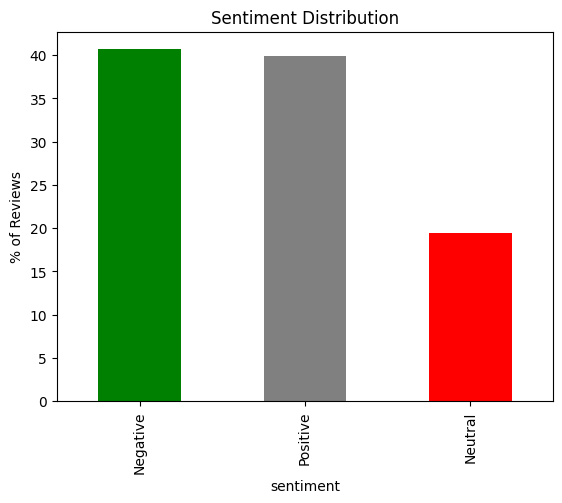

sentiment
Negative    40.69
Positive    39.88
Neutral     19.43
Name: proportion, dtype: float64

In [93]:
#What is the overall sentiment of user reviews?

sentiment_counts = df['sentiment'].value_counts(normalize=True) * 100
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'], title='Sentiment Distribution')
plt.ylabel('% of Reviews')
plt.show()
sentiment_counts

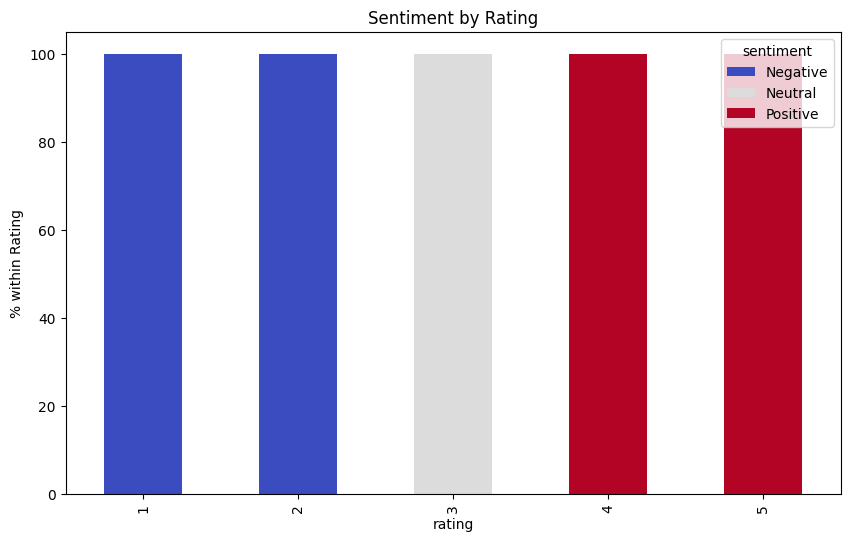

In [94]:
#How does sentiment vary by rating?

if 'rating' in df.columns:
    rating_sentiment = pd.crosstab(df['rating'], df['sentiment'], normalize='index') * 100
    rating_sentiment.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6))
    plt.title('Sentiment by Rating')
    plt.ylabel('% within Rating')
    plt.show()
    rating_sentiment
else:
    print("Rating column not found.")

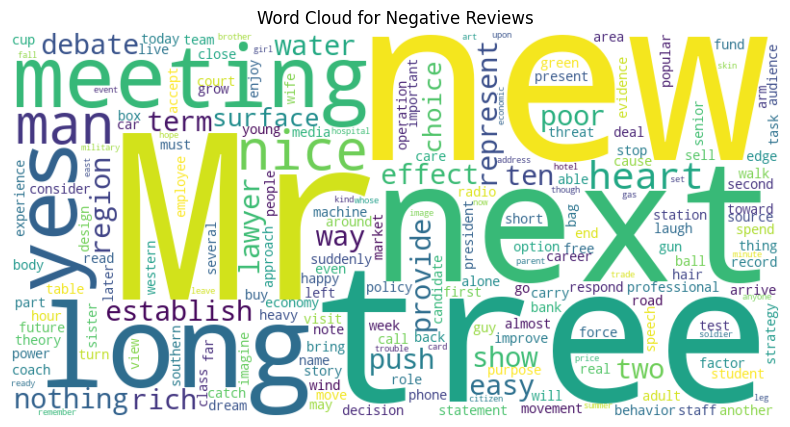

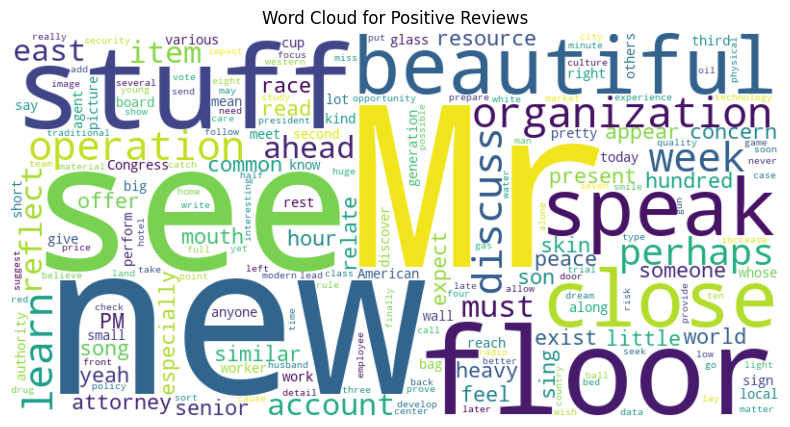

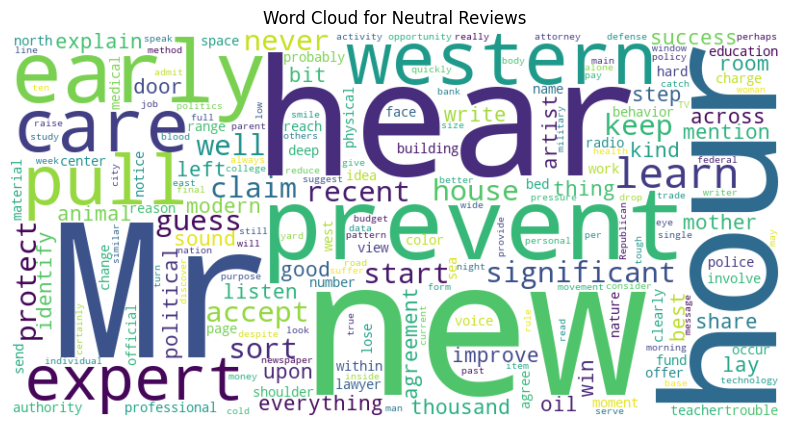

In [95]:
#Which keywords or phrases are most associated with each sentiment class?

for sentiment in df['sentiment'].unique():
    text = " ".join(df[df['sentiment'] == sentiment]['review'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Reviews")
    plt.show()

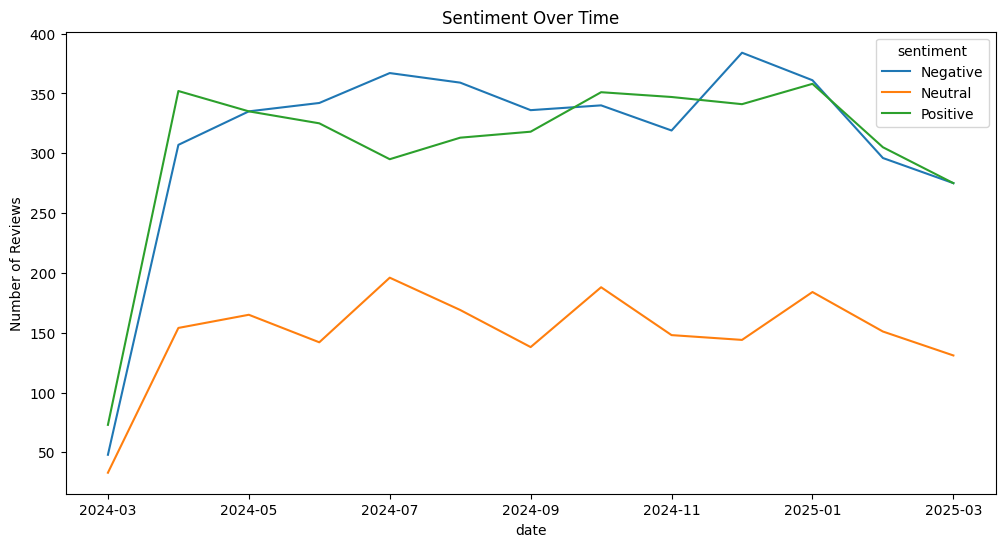

In [96]:
# How has sentiment changed over time?

if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    sentiment_time = df.groupby([df['date'].dt.to_period('M'), 'sentiment']).size().unstack().fillna(0)
    sentiment_time.index = sentiment_time.index.astype(str)
    sentiment_time.plot(figsize=(12, 6), title='Sentiment Over Time')
    plt.ylabel('Number of Reviews')
    plt.show()
else:
    print("Date column not found.")

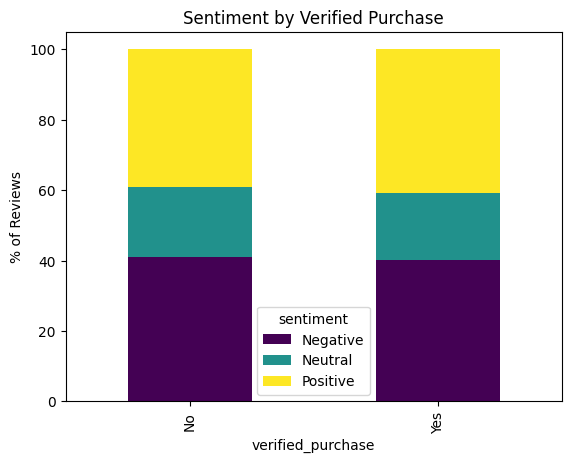

In [97]:
#Do verified users tend to leave more positive or negative reviews?

if 'verified_purchase' in df.columns:
    verified_dist = pd.crosstab(df['verified_purchase'], df['sentiment'], normalize='index') * 100
    verified_dist.plot(kind='bar', stacked=True, colormap='viridis', title='Sentiment by Verified Purchase')
    plt.ylabel('% of Reviews')
    plt.show()
    verified_dist
else:
    print("Verified purchase column not found.")

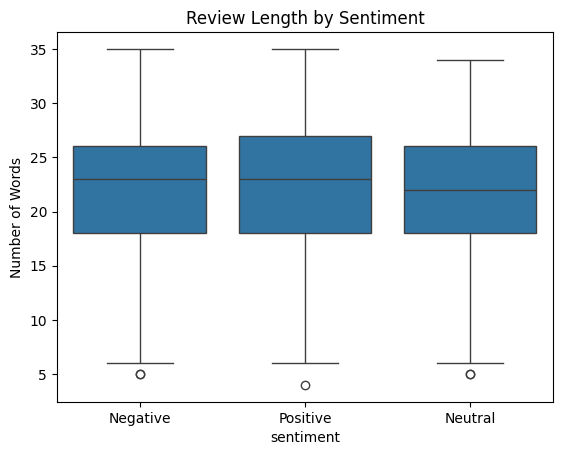

In [98]:
#Are longer reviews more likely to be negative or positive?

df['review_length'] = df['review'].astype(str).apply(lambda x: len(x.split()))
sns.boxplot(x='sentiment', y='review_length', data=df)
plt.title('Review Length by Sentiment')
plt.ylabel('Number of Words')
plt.show()

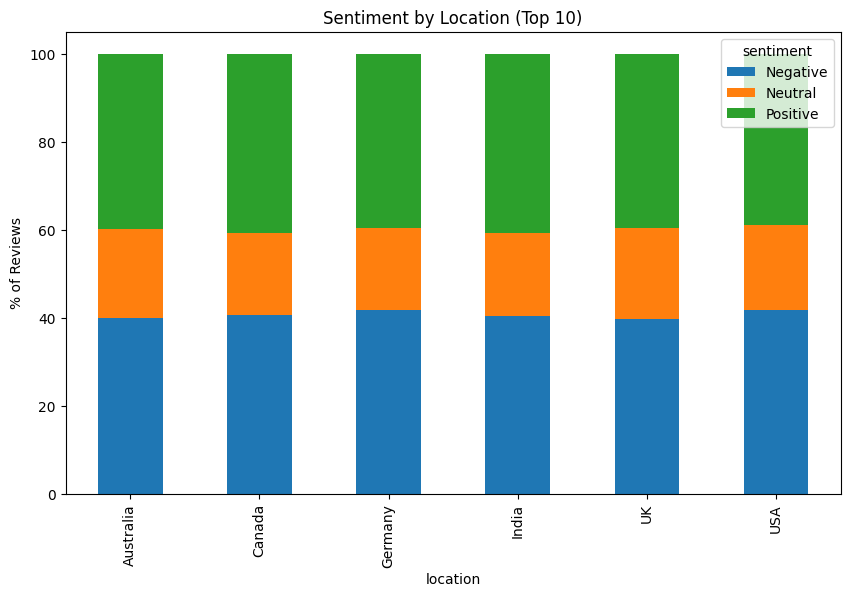

In [99]:
#Which locations show the most positive or negative sentiment?

if 'location' in df.columns:
    top_locations = df['location'].value_counts().nlargest(10).index
    df_filtered = df[df['location'].isin(top_locations)]
    loc_sent = pd.crosstab(df_filtered['location'], df_filtered['sentiment'], normalize='index') * 100
    loc_sent.plot(kind='bar', stacked=True, figsize=(10, 6), title='Sentiment by Location (Top 10)')
    plt.ylabel('% of Reviews')
    plt.show()
    loc_sent
else:
    print("Location column not found.")

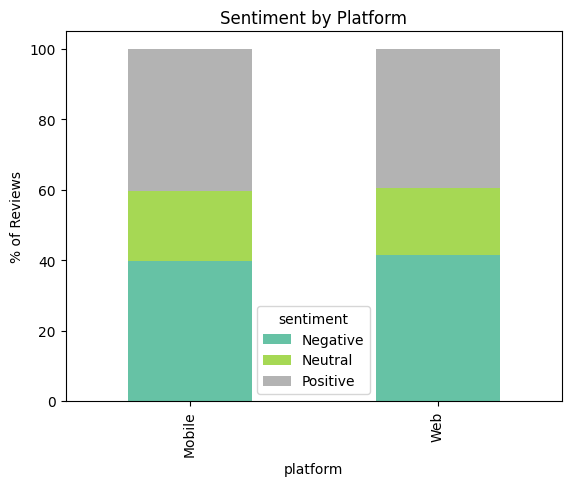

In [100]:
#Is there a difference in sentiment across platforms (Web vs Mobile)?

if 'platform' in df.columns:
    platform_sent = pd.crosstab(df['platform'], df['sentiment'], normalize='index') * 100
    platform_sent.plot(kind='bar', stacked=True, colormap='Set2', title='Sentiment by Platform')
    plt.ylabel('% of Reviews')
    plt.show()
    platform_sent
else:
    print("Platform column not found.")

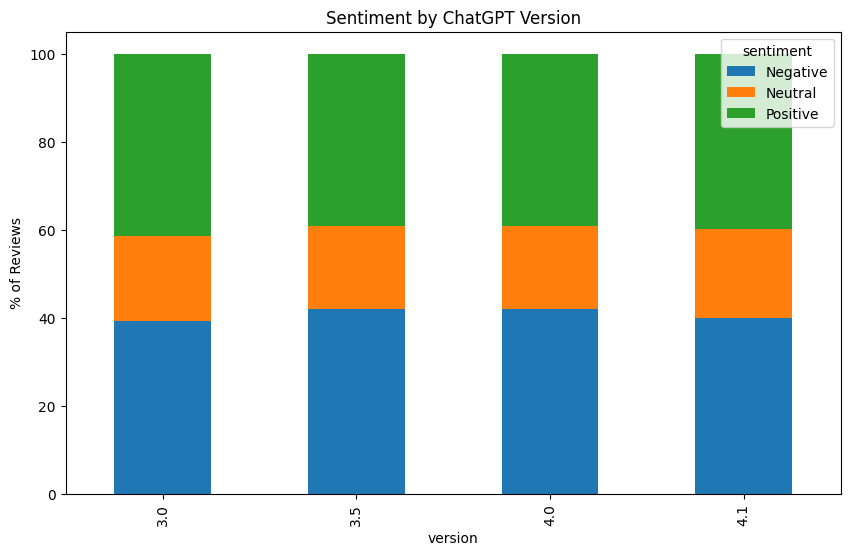

In [101]:
#Which ChatGPT versions are associated with higher/lower sentiment?

if 'version' in df.columns:
    version_sent = pd.crosstab(df['version'], df['sentiment'], normalize='index') * 100
    version_sent.plot(kind='bar', stacked=True, figsize=(10, 6), title='Sentiment by ChatGPT Version')
    plt.ylabel('% of Reviews')
    plt.show()
    version_sent
else:
    print("Version column not found.")

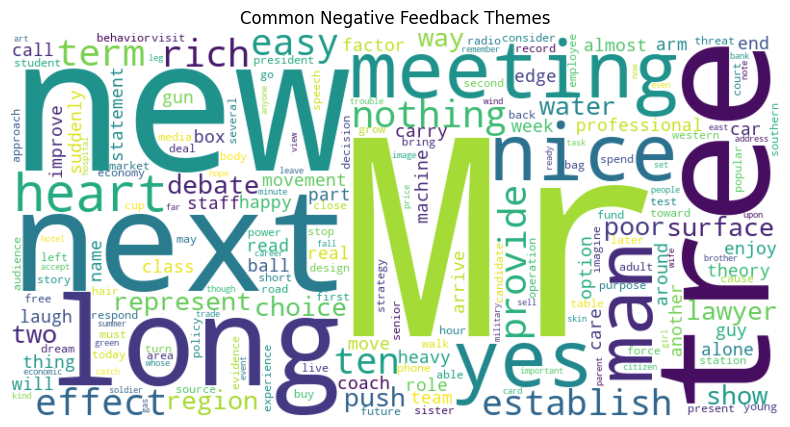

In [102]:
#What are the most common negative feedback themes?

neg_reviews = " ".join(df[df['sentiment'] == 'Negative']['review'].dropna().astype(str))
neg_wc = WordCloud(width=800, height=400, background_color='white').generate(neg_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(neg_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Common Negative Feedback Themes')
plt.show()